In [1]:
import strategy
import pandas as pd
import matplotlib.pyplot as plt


def create_df():
    df = pd.DataFrame(columns=["datetime", "founds", "coin_traded", "traded", "gained",
                      "max_trade", "last_price", "last_ema_macd", "last_macd", "last_momentum"])
    return df


def parseData(data: pd.DataFrame):
    data["datetime"] = pd.to_datetime(data["close_time"], unit='ms')
    data["Close"] = data["close"].astype(float)
    return data[['datetime', 'Close']]


def back_test(data: pd.DataFrame):
    position = strategy.Position()
    res = create_df()
    for i in range(100, len(data)):
        current_data = data.copy().iloc[i-100:i]
        last_datetime, last_price, last_macd, last_ema_macd, last_momentum = strategy.strategy_macd(
            current_data, position)
        position.save_to_dataframe(
            last_datetime, last_price, last_ema_macd, last_macd, last_momentum, res)

    return res

def processData(path:str):
    raw_data = pd.read_csv(path)
    parse_data = parseData(raw_data)
    res = back_test(parse_data)
    return res

def plot(res:pd.DataFrame):

    x = res["datetime"]
    y = res["founds"]

    plt.figure(figsize=(20, 5))
    plt.plot(x, y)

    y = res["gained"]
    plt.figure(figsize=(20, 5))
    plt.plot(x, y)

    y = res["last_price"]
    plt.figure(figsize=(20, 5))
    plt.plot(x, y)
    

In [2]:
BTC = processData("backtesting/BTCUSDT-1m-2023-11-01.csv")

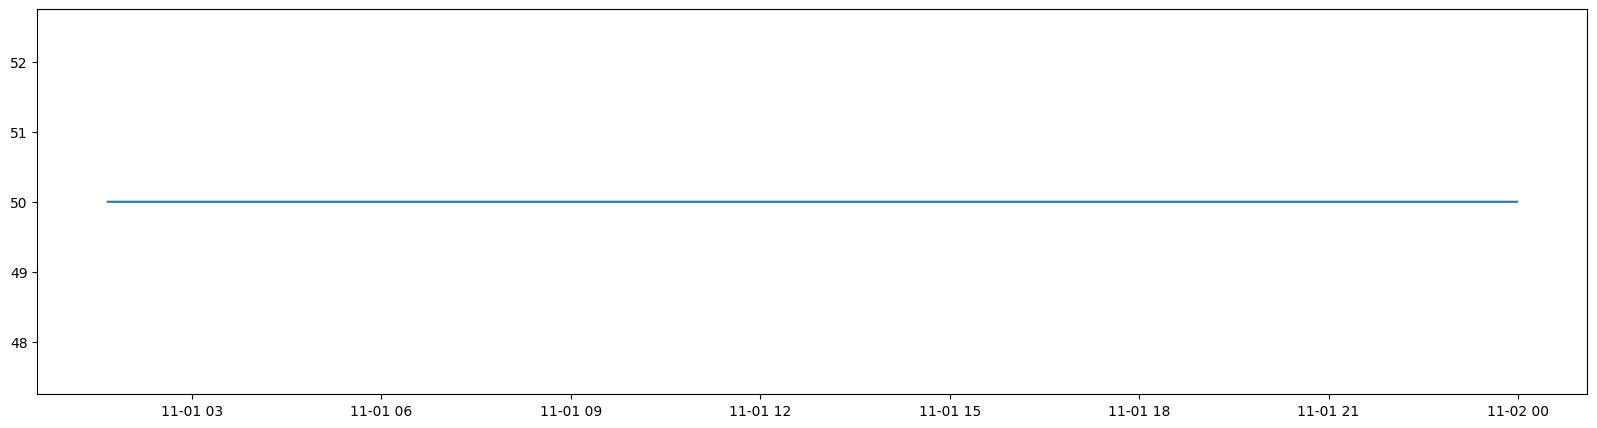

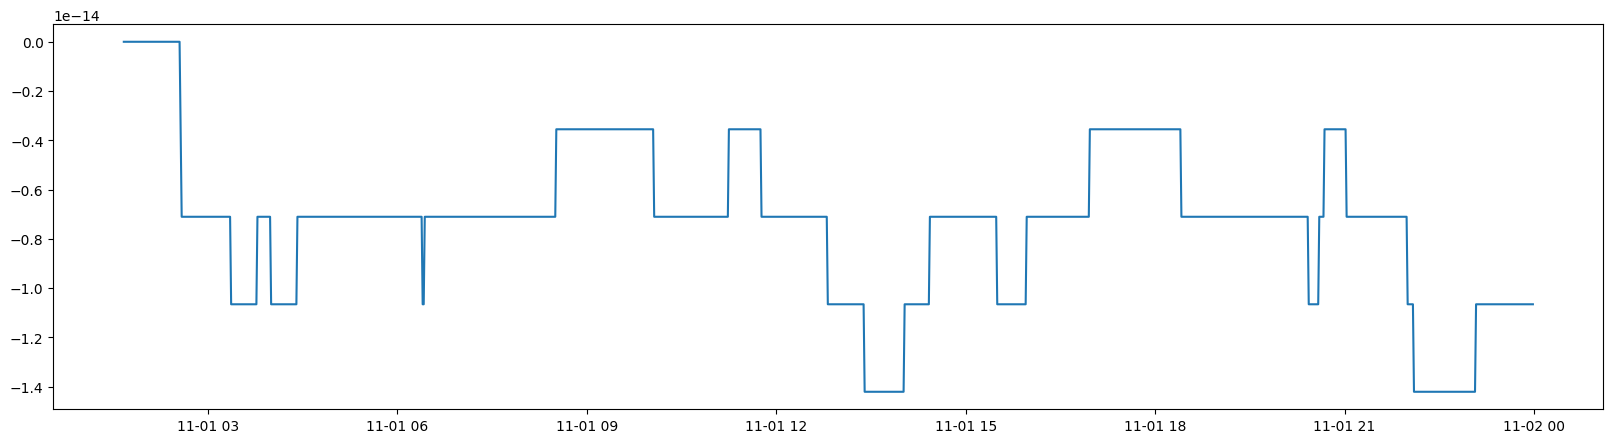

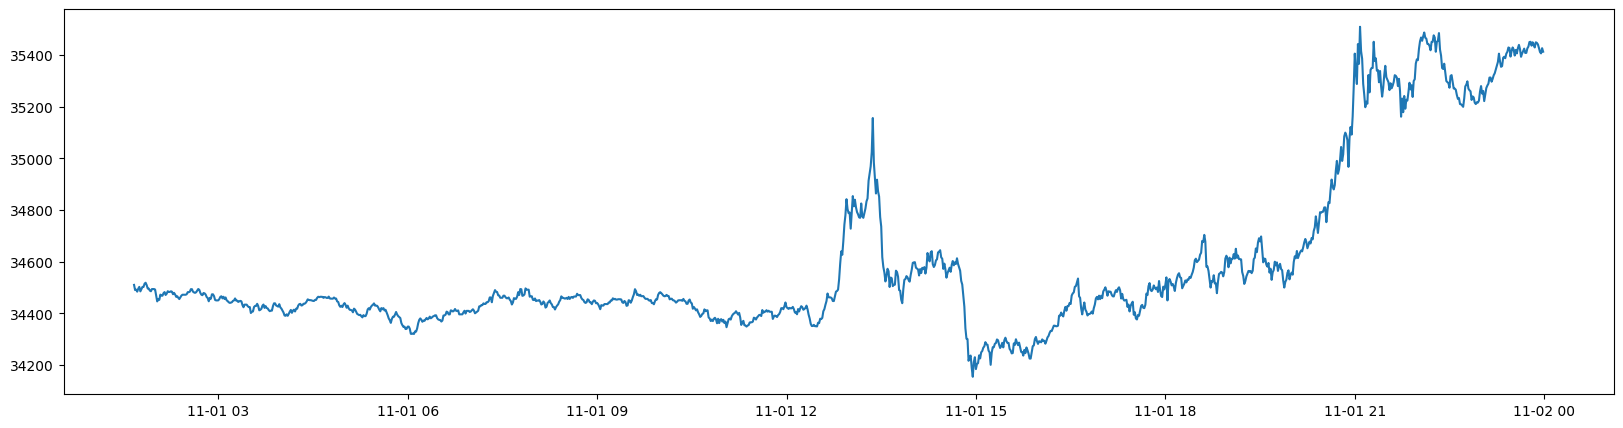

In [3]:
plot(BTC)

In [4]:
LINK = processData("backtesting/LINKUSDT-1m-2023-11-10.csv")

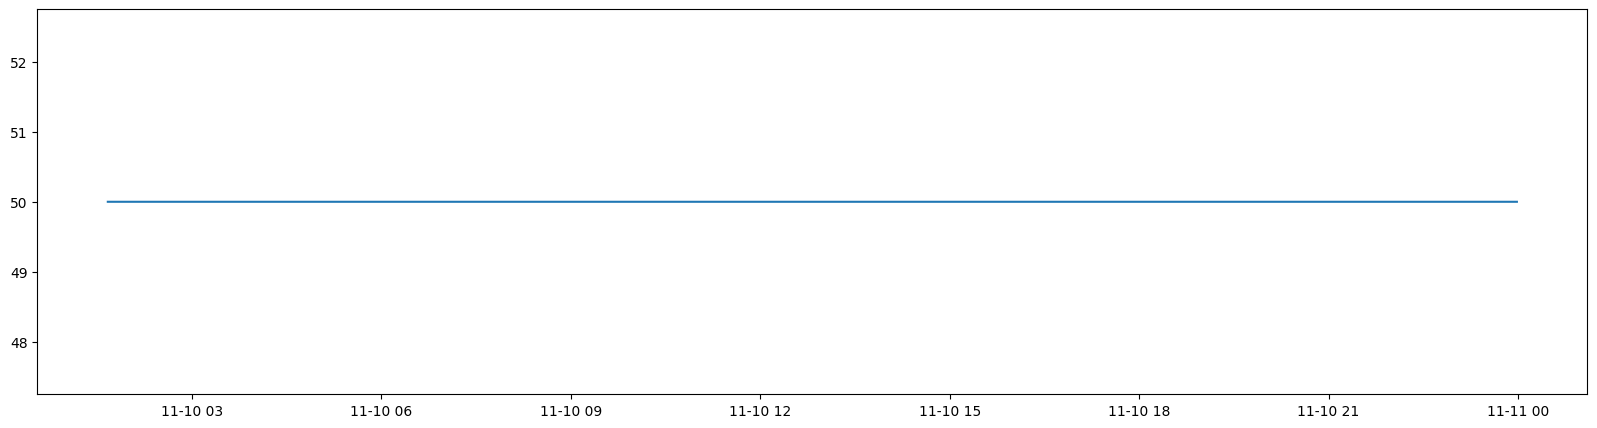

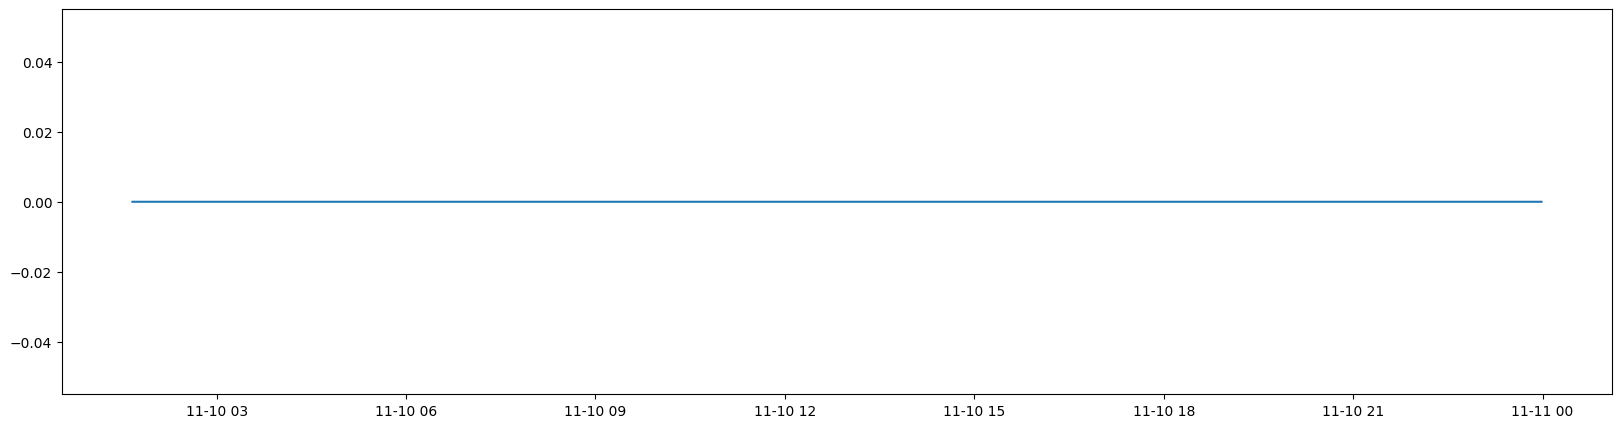

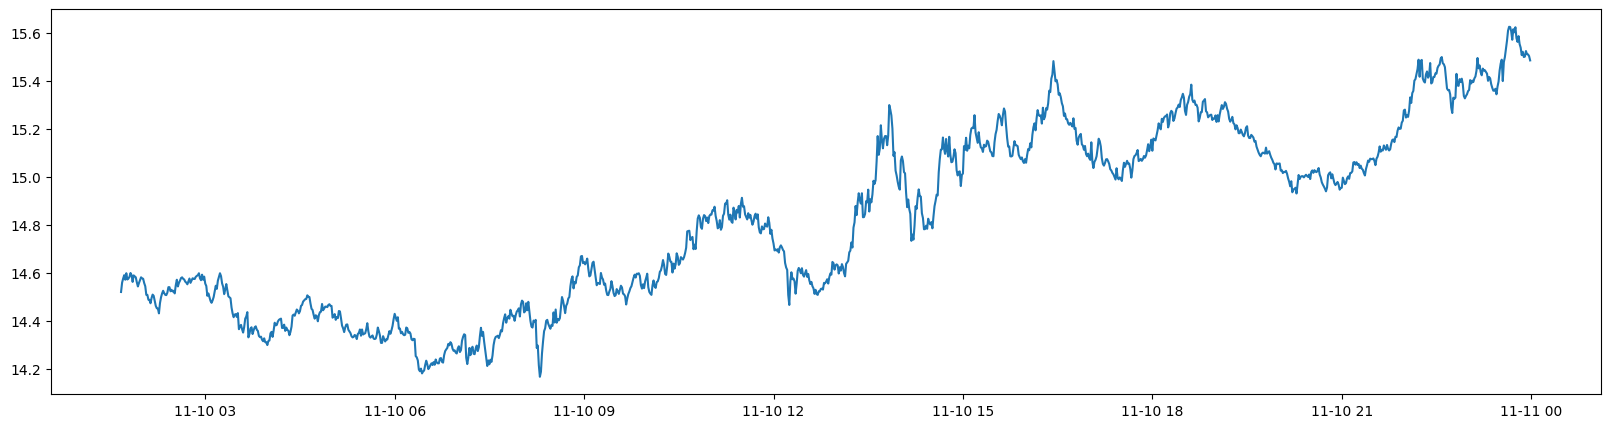

: 

In [5]:
plot(LINK)